In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**DATA CLEANING**

In [6]:
# remove kmpl from mileage and convert it into float type from object type
df['mileage'] = df['mileage'].apply(lambda x: x.replace("kmpl","") if (type(x)) == str else np.nan )
df['mileage'] = df['mileage'].apply(lambda x: x.replace("km/kg","") if (type(x)) == str else np.nan )
df['mileage'] = df['mileage'].astype("float")

In [7]:
# remove CC from engine variable 
df['engine'] = df['engine'].apply(lambda x: x.replace("CC","") if type(x)==str else np.nan)

In [8]:
# remove bhp from max_power and convert it into float type from object type
df['max_power'] = df['max_power'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )

#### Missing values

In [9]:
# check missing values percentage in each column
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

torque       2.73
mileage      2.72
engine       2.72
seats        2.72
max_power    2.65
dtype: float64

In [10]:
# As seats is categorical column, let's first convert it to categorical from float
print("Before converting dtype: " + str(df.seats.dtype))
df.seats = df.seats.astype('category')
print("After converting dtype: " + str(df.seats.dtype))

Before converting dtype: float64
After converting dtype: category


In [11]:
df.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [12]:
df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [13]:
# we will drop the torque as it doesn' have proper format
df.drop(["torque"],axis=1,inplace=True)

In [15]:
# check missing values percentage in each column
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

mileage      2.72
engine       2.72
seats        2.72
max_power    2.65
name         0.00
dtype: float64

In [16]:
df[df["mileage"].isnull() & df["engine"].isnull() & df["seats"].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


above rows indicate pattern in missing values, it is better to drop them instead of imputing

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(7907, 12)

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,5.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           7907 non-null   object  
 1   year           7907 non-null   int64   
 2   selling_price  7907 non-null   int64   
 3   km_driven      7907 non-null   int64   
 4   fuel           7907 non-null   object  
 5   seller_type    7907 non-null   object  
 6   transmission   7907 non-null   object  
 7   owner          7907 non-null   object  
 8   mileage        7907 non-null   float64 
 9   engine         7907 non-null   object  
 10  max_power      7907 non-null   object  
 11  seats          7907 non-null   category
dtypes: category(1), float64(1), int64(3), object(7)
memory usage: 749.4+ KB


In [21]:
df[df['max_power'].str.contains('bhp')]
# we have one row containing only bhp with no value in it, lets drop it
df = df[df['max_power'].str.contains('bhp') == False]
# convert from object type to their respective types
df["engine"] = df["engine"].astype(int)
df["max_power"] = df["max_power"].astype(float)

#### EDA

In [22]:
df["fuel"].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

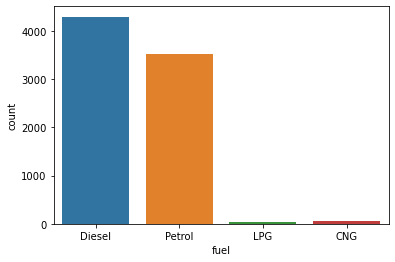

In [23]:
sns.countplot(x='fuel', data=df)
plt.show()

 Inference - Diesel cars leading and very few LPG,CNG cars 

In [24]:
df["seller_type"].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

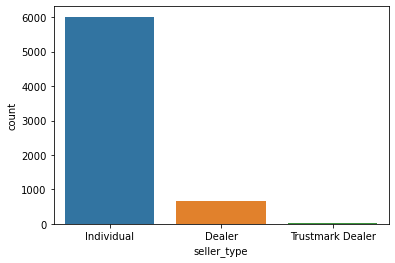

In [41]:
sns.countplot(x='seller_type', data=df)
plt.show()

Most of the sellers (6563) in this platform are individuals

In [42]:
df["transmission"].value_counts()

Manual       6132
Automatic     570
Name: transmission, dtype: int64

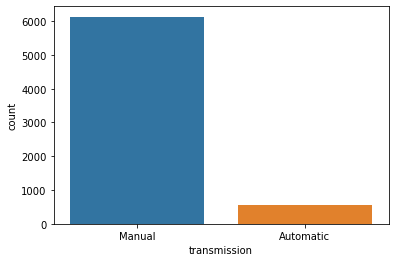

In [43]:
sns.countplot(x='transmission', data=df)
plt.show()

  Transmission type of most cars are manual

In [45]:
df["owner"].value_counts()

First Owner             4166
Second Owner            1885
Third Owner              492
Fourth & Above Owner     154
Test Drive Car             5
Name: owner, dtype: int64

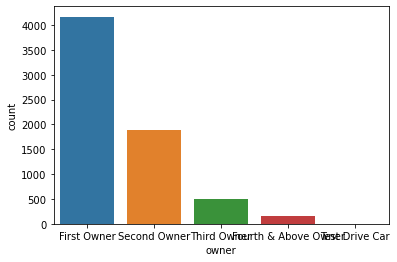

In [46]:
sns.countplot(x='owner', data=df)
plt.show()

Most of the cars are single owner 

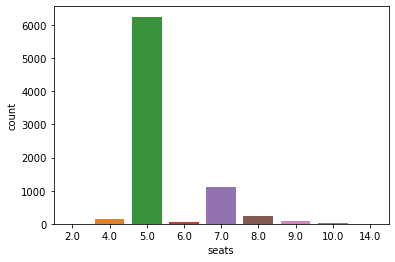

In [30]:
sns.countplot(x='seats', data=df)
plt.show()

Most of them are 5 seater cars followed by 7 seater cars

<AxesSubplot:xlabel='mileage'>

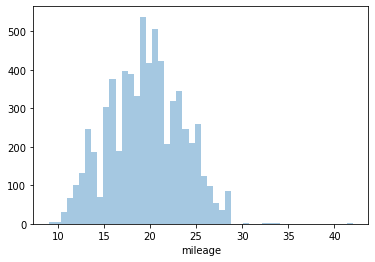

In [47]:
sns.distplot(df['mileage'],kde=False)

from above distribution plot we see some cars having 0 mileage, it does not makesense, need to drop them

In [48]:
df[df["mileage"]==0]
df = df[df["mileage"]!=0]

<AxesSubplot:xlabel='engine'>

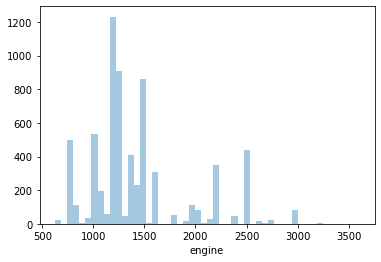

In [49]:
sns.distplot(df['engine'], kde =False)

In [50]:
df[df["engine"]>3500]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
134,Jeep Wrangler 2016-2019 3.6 4X4,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0,5


We see all above rows contain same information, lets keep only unique rows dopping duplicates

In [51]:
df = df.drop_duplicates()

In [52]:
df[df["engine"]>3000]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
134,Jeep Wrangler 2016-2019 3.6 4X4,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5.0,5
1530,Ford Endeavour 3.2 Titanium AT 4X4,3250000,12000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0,4
1923,Ford Endeavour 3.2 Titanium AT 4X4,2280000,120000,Diesel,Individual,Automatic,Second Owner,10.91,3198,197.0,7.0,6
3214,Ford Endeavour 3.2 Titanium AT 4X4,2100000,80000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0,6
5962,Mercedes-Benz E-Class E350 Petrol,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498,272.0,5.0,13
6468,Ford Endeavour 3.2 Titanium AT 4X4,3200000,35000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0,4


we have some high end cars having high engine cc

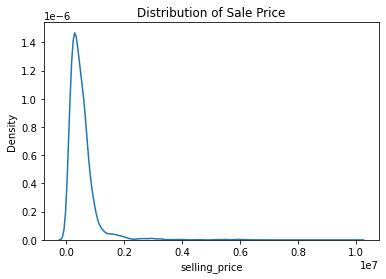

In [37]:
sns.kdeplot(df['selling_price']).set_title('Distribution of Sale Price')
plt.show()

selling_price is positively skewed

### Buiness Task : What are the Factors that affect the Selling prices of the Car?

In [56]:
# let's extact how many years old the car is from year column and drop year column

df["old"] = 2022-df["year"]
df.drop(["year"],axis=1,inplace=True)



In [54]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,15


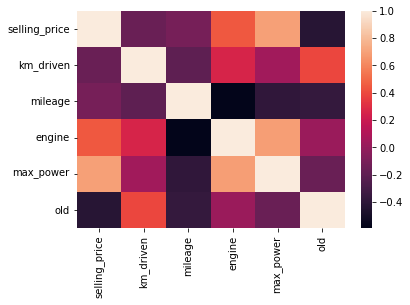

In [55]:
sns.heatmap(df.corr())
plt.show()

#### Factors That affect the Selling Price of the Car
**selling price is negatively correlated with**:
1) old variable
2) km_driven  
**selling price is positevly correlated with**:
1) max_power
2) engine 